<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/gradient_descent_linear_salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("sample_data/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
x_train = df.YearsExperience
y_train = df.Salary

In [9]:
def tabulate_data(x, y):
  fig, ax = plt.subplots()
  table_data = np.column_stack((x, y))
  table = ax.table(cellText=table_data, colLabels=['Years of experience', 'Salary'], loc='center')

  # Hide the axes
  ax.axis('off')

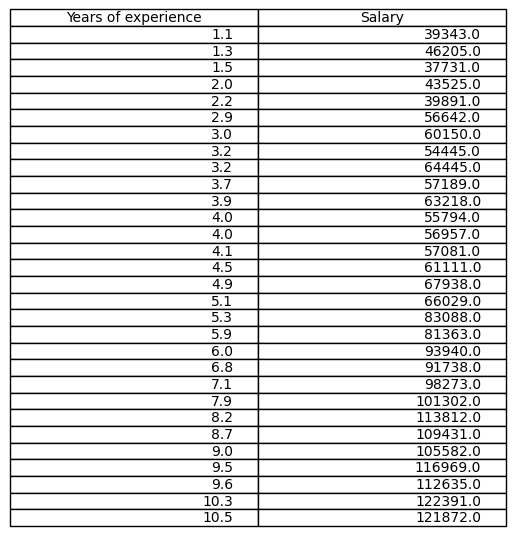

In [10]:
tabulate_data(x_train, y_train)

In [11]:
def plt_data(x, y, c = "r", marker = "x"):
  plt.scatter(x, y, c=c, marker=marker)
  plt.xlabel("Years of experience")
  plt.ylabel("Salary")

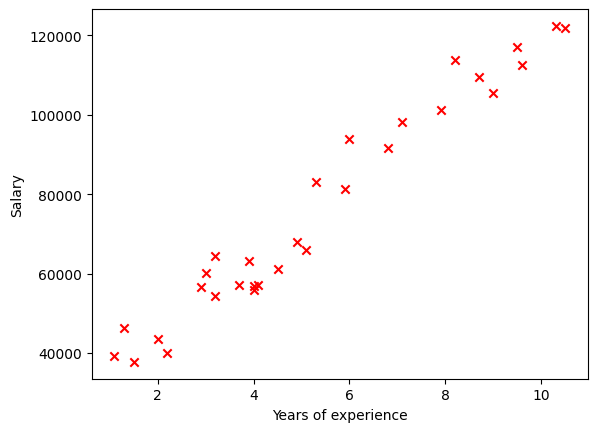

In [12]:
plt_data(x_train, y_train)
plt.show()

In [13]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = w * x[i] + b
    cost += (f_wb - y[i]) ** 2
  j = cost / (2 * m)
  return j

In [14]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw /= m
  dj_db /= m
  return dj_dw, dj_db

In [15]:
def gradient_descent(x, y, w_init, b_init, alpha, iteration_count, cost_function, gradient_function):

  w = w_init
  b = b_init

  for i in range(iteration_count):
    dj_dw, dj_db = gradient_function(x, y, w, b)

    w -= alpha * dj_dw
    b -= alpha * dj_db

  return w, b

In [16]:
w_init = 0
b_init = 0
tmp_alpha = 1.0e-2
iterations = 1000

w_final, b_final = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

In [17]:
print(f"w = {w_final}, b = {b_final}")
print(f"Model: f(x) = {w_final}x + {b_final}")

w = 9876.112752879602, b = 22920.48554852225
Model: f(x) = 9876.112752879602x + 22920.48554852225


In [18]:
def get_model(w, b):
  return lambda x: w * x + b

In [23]:
model = get_model(w_final, b_final)

In [25]:
def plt_regression_line():
  x = np.linspace(0, 12, 100)
  y = model(x)
  plt.plot(x, y)

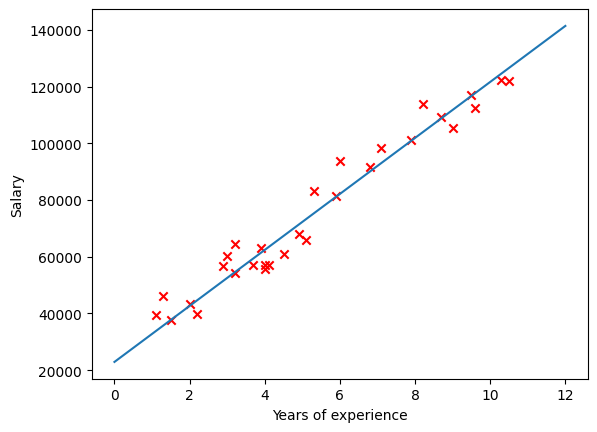

In [26]:
plt_data(x_train, y_train)
plt_regression_line()
plt.show()

In [27]:
x_pred = np.array([3.0, 4.2, 6.6, 7.1, 9.1, 12.0])
y_pred = model(x_pred)

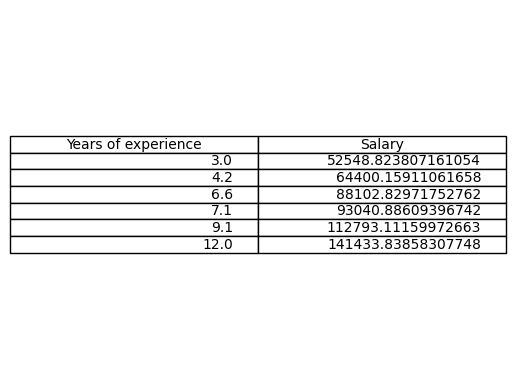

In [28]:
tabulate_data(x_pred, y_pred)

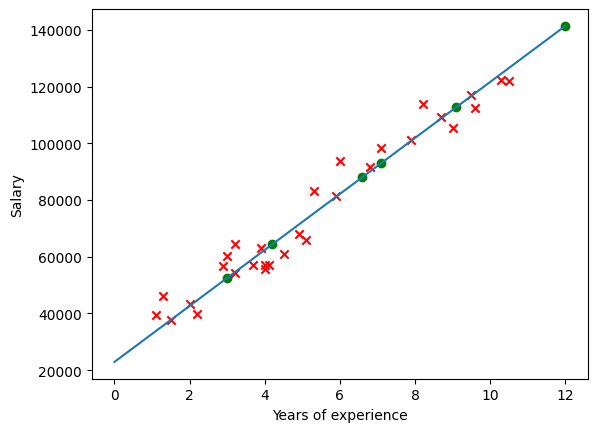

In [29]:
plt_data(x_train, y_train)
plt_data(x_pred, y_pred, c="g", marker="o")
plt_regression_line()
plt.show()